# Example for DBSCAN Clustering

The data comes from https://openflights.org/data.html

As of January 2017, the OpenFlights Airports Database contains over 10,000 airports, train stations and ferry terminals spanning the globe, as shown in the map above. Each entry contains the following information:


| Feature     | Meaning |
|-------------|----------|
|Airport ID|Unique OpenFlights identifier for this airport.
|Name|Name of airport. May or may not contain the City name.
|City|Main city served by airport. May be spelled differently from Name.
|Country|Country or territory where airport is located. See countries.dat to cross-reference to ISO 3166-1 codes.
|IATA|3-letter IATA code. Null if not assigned/unknown.
|ICAO|4-letter ICAO code.Null if not assigned.
|Latitude|Decimal degrees, usually to six significant digits. Negative is South, positive is North.
|Longitude|Decimal degrees, usually to six significant digits. Negative is West, positive is East.
|Altitude|In feet.
|Timezone|Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
|DST|Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
|Tz database time zone|Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
|Type|Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.
|Source|Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included. 

The data is UTF-8 encoded.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [3]:
sns.set_style("ticks")

## Load the data into a data frame

In [4]:
def loadData(filename):
    columnHeaders = ["id", "name", "city", "country", "IATA", "ICAO",\
                     "lat", "lon", "alt", "tz", "DST", "TZ_DB", "type", "source"]
    return pd.read_csv(filename, header=None, index_col=0, names=columnHeaders )

In [5]:
path = "./"
file = "airports.dat"

In [6]:
df = loadData(path+file)

In [7]:
df[df["country"] == "Bulgaria"]

,name,city,country,IATA,ICAO,lat,lon,alt,tz,DST,TZ_DB,type,source
id,,,,,,,,,,,,,
1191,Burgas Airport,Bourgas,Bulgaria,BOJ,LBBG,42.569599,27.515200,135,2,E,Europe/Sofia,airport,OurAirports
1192,Gorna Oryahovitsa Airport,Gorna Orechovica,Bulgaria,GOZ,LBGO,43.151402,25.712900,285,2,E,Europe/Sofia,airport,OurAirports
1193,Plovdiv International Airport,Plovdiv,Bulgaria,PDV,LBPD,42.067799,24.850800,597,2,E,Europe/Sofia,airport,OurAirports
1194,Sofia Airport,Sofia,Bulgaria,SOF,LBSF,42.696693,23.411436,1742,2,E,Europe/Sofia,airport,OurAirports
1195,Stara Zagora Airport,Stara Zagora,Bulgaria,\N,LBSZ,42.376667,25.655000,558,2,E,Europe/Sofia,airport,OurAirports
1196,Varna Airport,Varna,Bulgaria,VAR,LBWN,43.232101,27.825100,230,2,E,Europe/Sofia,airport,OurAirports
11873,Uzundzhovo Air Base,Haskovo,Bulgaria,\N,LBHS,41.976398,25.589800,160,\N,\N,\N,airport,OurAirports
11874,Gabrovnitsa Air Base,Gabrovnitsa,Bulgaria,\N,LBMG,43.544300,23.272499,626,\N,\N,\N,airport,OurAirports
11875,Graf Ignatievo Air Base,Graf Ignatievo,Bulgaria,\N,LBPG,42.290401,24.714001,190,\N,\N,\N,airport,OurAirports


## For DBSCAN we will use only the IATA Code and the latitude and longitude

In [8]:
#df_for_clustering = df[df["country"] == "Bulgaria"][["IATA","lat", "lon"]]

# for all airports
df_for_clustering = df[["IATA","lat", "lon"]]

## Perform the clustering
* define a minimum distance between airports. This leads to a definition of the eps for the core points
* as we use a polar coordinate system for the clustering, we have to transform the distance into a radians
* the haversine metric is used for the calculation of distances on the sphere
* the data for the clustering (lat, lon) is transformed into radians (instead of degrees) before clustering

In [9]:
distance_in_km = 160.
km_per_radians=6371.
df_for_clustering["dbscan_labels"] = DBSCAN(eps=distance_in_km/km_per_radians, min_samples=3, algorithm='ball_tree', metric="haversine").fit_predict(df_for_clustering[["lat", "lon"]].apply(np.radians))

#print(df_for_clustering)
# airports that are in a cluster
print(df_for_clustering[df_for_clustering["dbscan_labels"] == 0])

     IATA       lat         lon  dbscan_labels
id                                            
1     GKA -6.081690  145.391998              0
2     MAG -5.207080  145.789001              0
3     HGU -5.826790  144.296005              0
4     LAE -6.569803  146.725977              0
5420  CMU -6.024290  144.970993              0
5426  KRI -7.424380  144.250076              0
5429  MDU -6.147740  143.656998              0
5431  MXH -6.363330  143.238007              0
5433  TIZ -5.845000  142.947998              0
5437  WBM -5.643300  143.895004              0


/tmp/ipykernel_150855/216015007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_clustering["dbscan_labels"] = DBSCAN(eps=distance_in_km/km_per_radians, min_samples=3, algorithm='ball_tree', metric="haversine").fit_predict(df_for_clustering[["lat", "lon"]].apply(np.radians))


In the results we can see, that not all airports are assigned to a cluster (label = -1). These airports have a larger distance than 160 km to other airports in any direction

## Plot the results to show global relationships

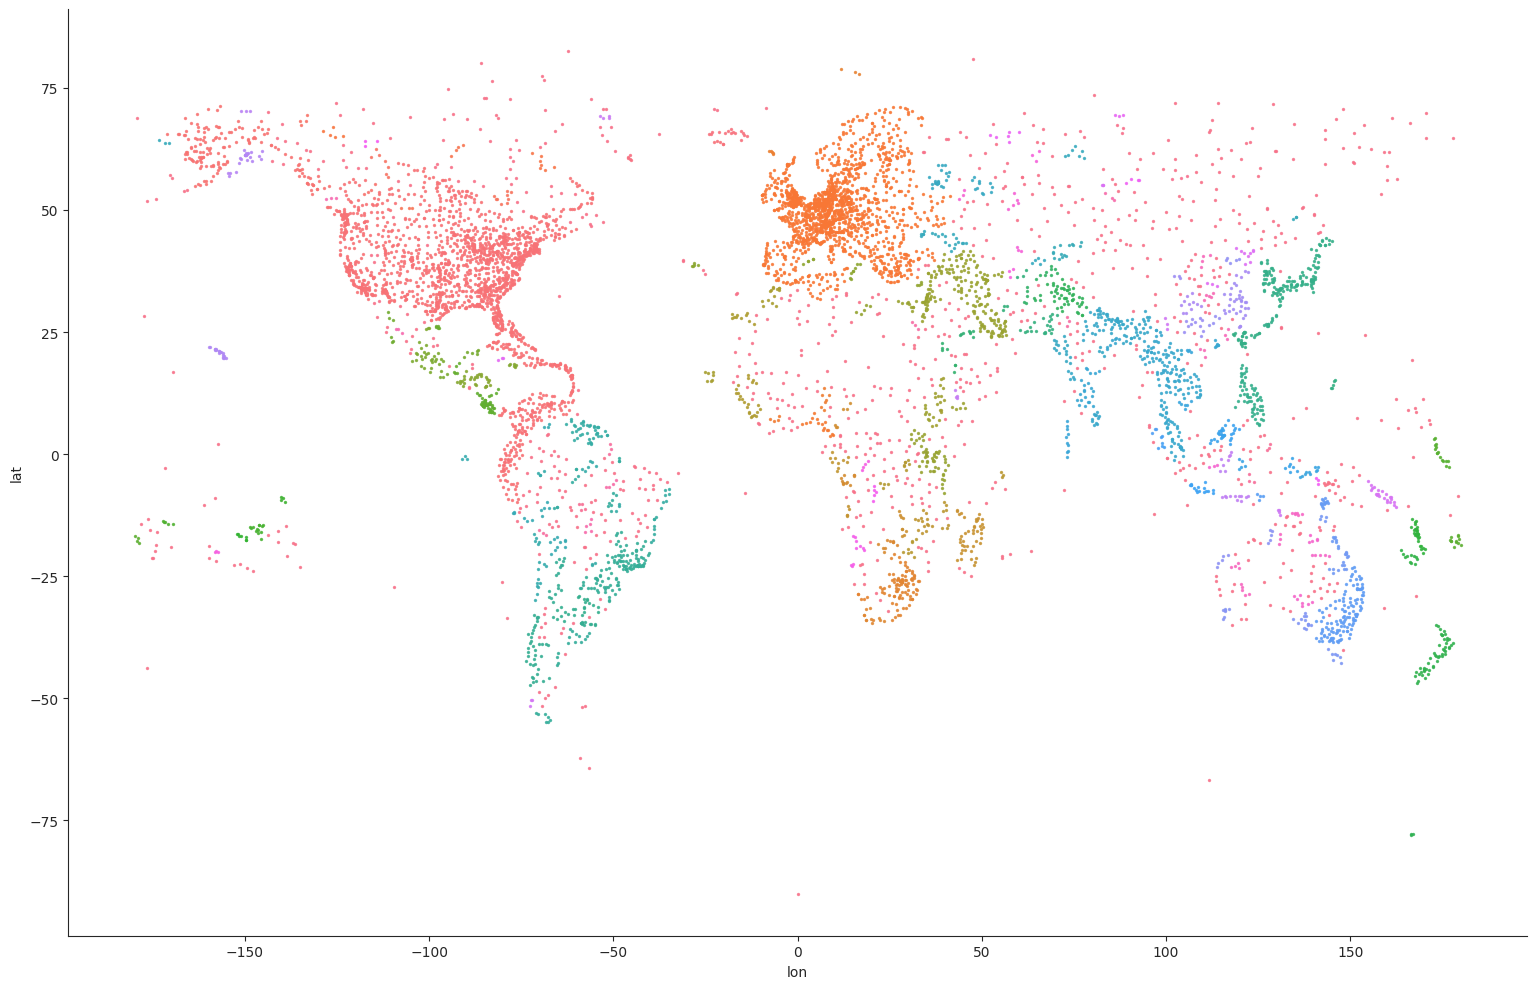

In [10]:
g = sns.lmplot(x='lon', # Horizontal axis
           y='lat', # Vertical axis
           data=df_for_clustering, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="dbscan_labels", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 2},
           height=10, legend=False) # S marker size

g.fig.set_figwidth(16)
g.fig.set_figheight(10)

In [11]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_for_clustering[["lat", "lon"]], df_for_clustering["dbscan_labels"])

In [12]:
print(silhouette_avg)

-0.22752573842835488


In [14]:
df_for_clustering[df_for_clustering["dbscan_labels"] == -1]

,IATA,lat,lon,dbscan_labels
id,,,,
5,POM,-9.443380,147.220001,-1
6,WWK,-3.583830,143.669006,-1
8,GOH,64.190903,-51.678101,-1
9,SFJ,67.012222,-50.711603,-1
10,THU,76.531197,-68.703201,-1
...,...,...,...,...
12033,RPM,-14.722800,134.746994,-1
12039,TYB,-29.451099,142.057999,-1
12050,HTT,38.201984,90.841495,-1
